# K-Nearest Neighbors (KNN) on the Iris Dataset

This notebook demonstrates your custom **KNN** implementation from the `rice2025` package using the Iris dataset.  
We’ll explore training, evaluation, and comparison with scikit-learn’s built-in KNN.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc

from rice2025.supervised.knn import KNN
from rice2025.metrics import accuracy, confusion_matrix_custom


In [4]:
# Load Iris dataset from CSV
import pandas as pd

df = pd.read_csv("iris.csv")  # make sure iris.csv is in the same folder as your notebook

# Optionally rename columns if they differ from sklearn's version
df.columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "target"]

# Map numeric target values to class labels (if necessary)
if df["target"].dtype != "object":
    df["target"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


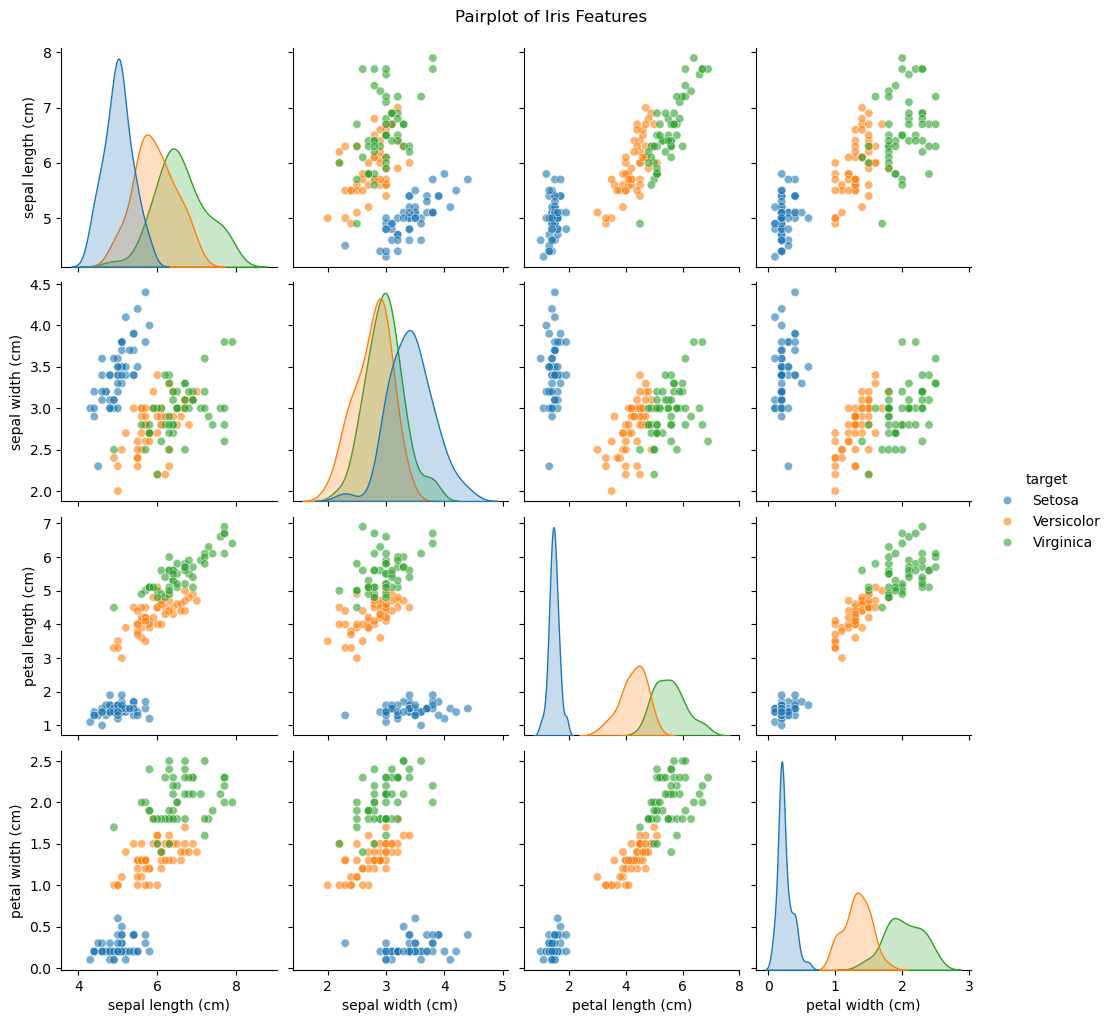

In [5]:
sns.pairplot(
    df,
    hue='target',
    vars=['sepal length (cm)', 'sepal width (cm)',
          'petal length (cm)', 'petal width (cm)'],
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()


In [6]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
model = KNN(k=5)
model.fit(X_train_scaled, y_train.values)
y_pred = model.predict(X_test_scaled)

acc = accuracy(y_test.values, y_pred)
print(f"Custom KNN Accuracy: {acc:.2f}")


Custom KNN Accuracy: 0.93


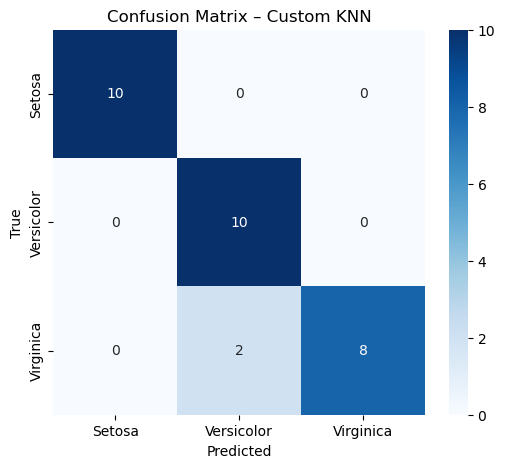

In [8]:
cm = confusion_matrix_custom(y_test.values, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Custom KNN")
plt.show()


In [9]:
sklearn_knn = KNeighborsClassifier(n_neighbors=5)
sklearn_knn.fit(X_train_scaled, y_train)
sklearn_acc = sklearn_knn.score(X_test_scaled, y_test)
print(f"Sklearn KNN Accuracy: {sklearn_acc:.2f}")


Sklearn KNN Accuracy: 0.93


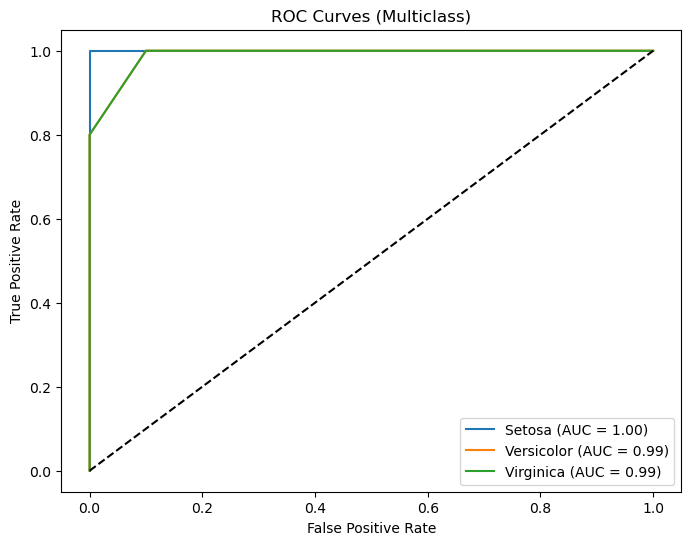

In [10]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_prob = sklearn_knn.predict_proba(X_test_scaled)

fpr, tpr, roc_auc = {}, {}, {}
for i, label in enumerate(np.unique(y)):
    fpr[label], tpr[label], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.plot(fpr[label], tpr[label],
             label=f"{label} (AUC = {roc_auc[label]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Multiclass)")
plt.legend(loc="lower right")
plt.show()


In [11]:
print("Classification Report (Sklearn):")
print(classification_report(y_test, sklearn_knn.predict(X_test_scaled)))


Classification Report (Sklearn):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.83      1.00      0.91        10
   Virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

